<a href="https://colab.research.google.com/github/arexdevson/Analises-Python/blob/main/NikeRun.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Objetivos:


## Realizar uma avaliação pessoal dos meus dados de corridas obtidos através do pacote "nrc-exporter"

#Bibliotecas

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
from functools import reduce
from google.colab import drive

In [ ]:

warnings.filterwarnings('ignore') # Ignorando avisos padrão do Google Colab

# Importação dos Dados


In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
nk_weather = pd.read_excel('/content/drive/MyDrive/Registros/Geral/PycharmProjects/NikeRun/NikeWeather.xlsx')

In [ ]:
nk_metric = pd.read_excel('/content/drive/MyDrive/Registros/Geral/PycharmProjects/NikeRun/NikeRunMetric.xlsx')

In [ ]:
nk_date = pd.read_excel('/content/drive/MyDrive/Registros/Geral/PycharmProjects/NikeRun/NikeDate.xlsx')

# Pré-Visualização dos dados

## Weather

In [ ]:
nk_weather.head() #Primeiros dados

,Weather
0,NotIdentified
1,NotIdentified
2,cloudy
3,clear_night
4,NotIdentified


In [ ]:
nk_weather.info() #informações estrutura

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107 entries, 0 to 106
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Weather  107 non-null    object
dtypes: object(1)
memory usage: 984.0+ bytes


In [ ]:
nk_weather.describe() #Descrição Geral

,Weather
count,107
unique,16
top,NotIdentified
freq,21


## Date

In [ ]:
nk_date.head()

,start_epoch_ms,DiasSemCorrer
0,2021-12-01,0
1,2021-12-27,26
2,2022-01-04,8
3,2022-03-08,64
4,2022-04-06,30


In [ ]:
nk_date.info() #informações estrutura

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107 entries, 0 to 106
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   start_epoch_ms  107 non-null    object
 1   DiasSemCorrer   107 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 1.8+ KB


In [ ]:
nk_date.describe() #Descrição Geral

,DiasSemCorrer
count,107.000000
mean,9.317757
std,16.753258
min,0.000000
25%,1.000000
50%,4.000000
75%,9.000000
max,124.000000


## Metric

In [ ]:
nk_metric.head()

,metric,summary,source,app_id,value
0,speed,mean,com.nike.running.android.fullpower,com.nike.sport.running.droid,6.615161
1,distance,total,com.nike.running.android.fullpower,com.nike.sport.running.droid,4.026061
2,steps,total,com.nike.running.android.fullpower,com.nike.sport.running.droid,4735.000000
3,nikefuel,mean,com.nike.nikefuelengine.1.0-A5.0,com.nike.sport.running.droid,25.970099
4,nikefuel,total,com.nike.nikefuelengine.1.0-A5.0,com.nike.sport.running.droid,948.341464


In [ ]:
nk_metric.info() #informações estrutura

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 751 entries, 0 to 750
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   metric   751 non-null    object 
 1   summary  751 non-null    object 
 2   source   751 non-null    object 
 3   app_id   751 non-null    object 
 4   value    751 non-null    float64
dtypes: float64(1), object(4)
memory usage: 29.5+ KB


In [ ]:
nk_metric.describe() #Descrição Geral

,value
count,751.000000
mean,803.791756
std,1673.466022
min,0.273212
25%,7.025782
50%,25.970099
75%,587.330500
max,9943.000000


#Tratamento dos dados

In [ ]:
speed = nk_metric.loc[nk_metric['metric']=="speed"]
calories = nk_metric.loc[nk_metric['metric']=="calories"]
distance = nk_metric.loc[nk_metric['metric']=="distance"]
steps = nk_metric.loc[nk_metric['metric']=="steps"]
pace = nk_metric.loc[nk_metric['metric']=="pace"]
nk_weather['Weather'] = nk_weather['Weather'].replace('NotIdentified','NãoIdentificado').replace('cloudy','Nublado - Dia').replace('mostly-cloudy-night','Nublado - Noite').replace('partly-cloudy-night','Nublado - Noite').replace('mostly-clear-night','Céu Limpo - Noite').replace('clear-day','Céu Limpo - Dia').replace('clear-night','Céu Limpo - Noite').replace('sunny','Ensolarado').replace('partly_sunny','Ensolarado').replace('mostly-clear-day','Ensolarado').replace('wind','Nublado').replace('light-thunderstorms','Nublado')
nk_weather['Weather'] = nk_weather['Weather'].replace('mostly-cloudy-day','Nublado - Dia').replace('partly-cloudy-day	','Nublado - Dia').replace('partly_cloudy_night','Nublado - Noite').replace('clear_night','Céu Limpo - Noite').replace('partly-cloudy-day','Nublado - Dia')


In [ ]:
diassemcorrer = nk_date['DiasSemCorrer'].values
data = nk_date['start_epoch_ms'].values

## Transformação das tabelas

In [ ]:
#Função

def transf_tabelas(df):
  df.drop(columns=['source','app_id'],inplace=True)
  df.reset_index(inplace=True)
  df.drop(columns='index',inplace=True)
  df['date'] = data
  df['diassemcorrer'] = diassemcorrer

  return df



In [ ]:
speed = transf_tabelas(speed)
calories = transf_tabelas(calories)
distance = transf_tabelas(distance)
pace = transf_tabelas(pace)

In [ ]:
nk_weather['date'] = data


## Juntando as tabelas


In [ ]:
nk_analysis = pd.DataFrame()

In [ ]:
nk_analysis['pace'] = pace['value']
nk_analysis['calories'] = calories['value']
nk_analysis['speed'] = speed['value']
nk_analysis['distance'] = distance['value']
nk_analysis['date'] = data
nk_analysis['DaysOffRun'] = nk_date['DiasSemCorrer'].values
nk_analysis['weather'] = nk_weather['Weather']
nk_analysis['Ano']= pd.to_datetime(nk_analysis['date']).dt.year
# Converte a coluna de datas para o tipo datetime
nk_analysis['Data_Ini'] = pd.to_datetime(nk_analysis['date'])

# Cria uma nova coluna com o início do mês
nk_analysis['ini_mes'] = nk_analysis['Data_Ini'].dt.to_period('M').dt.to_timestamp()

nk_analysis

,pace,calories,speed,distance,date,DaysOffRun,weather,Ano,Data_Ini,inicio_do_mes,ini_mes
0,9.070074,306.060,6.615161,4.026061,2021-12-01,0,NãoIdentificado,2021,2021-12-01,2021-12-01,2021-12-01
1,9.338788,526.578,6.424817,7.231488,2021-12-27,26,NãoIdentificado,2021,2021-12-27,2021-12-01,2021-12-01
2,8.705081,555.748,6.892527,7.390320,2022-01-04,8,Nublado - Dia,2022,2022-01-04,2022-01-01,2022-01-01
3,9.525107,526.388,6.299142,7.410240,2022-03-08,64,Céu Limpo - Noite,2022,2022-03-08,2022-03-01,2022-03-01
4,9.728813,544.387,6.167247,7.529181,2022-04-06,30,NãoIdentificado,2022,2022-04-06,2022-04-01,2022-04-01
...,...,...,...,...,...,...,...,...,...,...,...
102,6.792834,592.733,8.832837,7.009838,2024-06-12,2,NãoIdentificado,2024,2024-06-12,2024-06-01,2024-06-01
103,6.918779,199.560,8.672051,2.367952,2024-06-18,6,NãoIdentificado,2024,2024-06-18,2024-06-01,2024-06-01
104,7.196996,222.749,8.336811,2.746516,2024-06-18,1,NãoIdentificado,2024,2024-06-18,2024-06-01,2024-06-01
105,6.448318,601.507,9.304752,7.017334,2024-06-22,4,Nublado - Noite,2024,2024-06-22,2024-06-01,2024-06-01


In [ ]:
nk_analysis

,pace,calories,speed,distance,date,DaysOffRun,weather,Ano
0,9.070074,306.060,6.615161,4.026061,2021-12-01,0,NãoIdentificado,2021
1,9.338788,526.578,6.424817,7.231488,2021-12-27,26,NãoIdentificado,2021
2,8.705081,555.748,6.892527,7.390320,2022-01-04,8,Nublado - Dia,2022
3,9.525107,526.388,6.299142,7.410240,2022-03-08,64,Céu Limpo - Noite,2022
4,9.728813,544.387,6.167247,7.529181,2022-04-06,30,NãoIdentificado,2022
...,...,...,...,...,...,...,...,...
102,6.792834,592.733,8.832837,7.009838,2024-06-12,2,NãoIdentificado,2024
103,6.918779,199.560,8.672051,2.367952,2024-06-18,6,NãoIdentificado,2024
104,7.196996,222.749,8.336811,2.746516,2024-06-18,1,NãoIdentificado,2024
105,6.448318,601.507,9.304752,7.017334,2024-06-22,4,Nublado - Noite,2024


#Analises


In [ ]:
#1 ° - Numero de Corridas
print(f'O numero de corridas analisadas são: {nk_analysis["pace"].value_counts().sum()}')

O numero de corridas analisadas são: 107


In [ ]:
#2° - Numero de Corridas por Ano

print(f'O numero de corridas analisadas por {nk_analysis.groupby("Ano")["Ano"].value_counts()}:')

O numero de corridas analisadas por Ano
2021     2
2022    12
2023    61
2024    32
Name: count, dtype: int64:


In [ ]:
#3 - Distribuição das corrida por tipo de clima
nk_analysis['weather'] = nk_analysis['weather'].replace('NotIdentified','NãoIdentificado').replace('cloudy','Nublado - Dia').replace('mostly-cloudy-night','Nublado - Noite').replace('partly-cloudy-night','Nublado - Noite').replace('mostly-clear-night','Céu Limpo - Noite').replace('clear-day','Céu Limpo - Dia').replace('clear-night','Céu Limpo - Noite').replace('sunny','Ensolarado').replace('partly_sunny','Ensolarado').replace('mostly-clear-day','Ensolarado').replace('wind','Nublado').replace('light-thunderstorms','Nublado')
nk_analysis['weather'] = nk_analysis['weather'].replace('mostly-cloudy-day','Nublado - Dia').replace('partly-cloudy-day	','Nublado - Dia').replace('partly_cloudy_night','Nublado - Noite').replace('clear_night','Céu Limpo - Noite')
weather = nk_analysis['weather'].value_counts().reset_index()
weather['% perc'] = (weather['count']/nk_analysis['pace'].value_counts().sum())*100
weather

,weather,count,% perc
0,Nublado - Dia,30,28.037383
1,Nublado - Noite,23,21.495327
2,NãoIdentificado,21,19.626168
3,Céu Limpo - Noite,15,14.018692
4,Céu Limpo - Dia,9,8.411215
5,Ensolarado,6,5.607477
6,Nublado,3,2.803738


In [ ]:
#4° - Pace Médio por ano
nk_analysis.groupby('Ano')['pace'].mean()

Ano
2021    9.204431
2022    9.435464
2023    8.934033
2024    8.793989
Name: pace, dtype: float64

In [ ]:
#4.1 - Maior Pace por ano
nk_analysis.groupby('Ano')['pace'].max()

Ano
2021     9.338788
2022    10.146797
2023    16.083321
2024    22.934992
Name: pace, dtype: float64

In [ ]:
#4.2 - Menor pace por ano
corrida = nk_analysis.groupby('Ano')['pace'].min().reset_index()
corrida['LastYearPace'] = corrida['pace'].shift(1)
corrida['% Progresso'] = (corrida['pace']/corrida['LastYearPace'] -1)*100
corrida['LastYearPace'].fillna(0,inplace=True)
corrida['% Progresso'].fillna(0,inplace=True)

corrida

,Ano,pace,LastYearPace,% Progresso
0,2021,9.070074,0.000000,0.000000
1,2022,8.411776,9.070074,-7.257914
2,2023,6.224863,8.411776,-25.998233
3,2024,5.924465,6.224863,-4.825769


In [ ]:
#5 - Pace médio por weather
nk_analysis.groupby('weather')['pace'].min()

weather
Céu Limpo - Dia      6.551487
Céu Limpo - Noite    6.528828
Ensolarado           8.268100
Nublado              7.412095
Nublado - Dia        6.131682
Nublado - Noite      5.924465
NãoIdentificado      6.039720
Name: pace, dtype: float64

In [ ]:
#5.1 - Pace médio por weather/ano
nk_analysis.groupby(['weather','Ano'])['pace'].min().reset_index()

,weather,Ano,pace
0,Céu Limpo - Dia,2023,6.551487
1,Céu Limpo - Noite,2022,9.525107
2,Céu Limpo - Noite,2023,6.528828
3,Céu Limpo - Noite,2024,6.626421
4,Ensolarado,2022,9.000298
5,Ensolarado,2023,8.268100
6,Nublado,2023,7.412095
7,Nublado,2024,10.504559
8,Nublado - Dia,2022,8.705081
9,Nublado - Dia,2023,6.224863


In [ ]:
#6° - Distância somada percorrida por ano
distance_run = nk_analysis.groupby('Ano')['distance'].sum().reset_index()
runs_made = nk_analysis.groupby("Ano")["Ano"].value_counts().reset_index()
#distance_run['Avg Distance - Run'] =
distance_run['Runs Made'] = runs_made['count']
distance_run['Avg Distance - Made'] = distance_run['distance'] / distance_run['Runs Made']
distance_run


,Ano,distance,Runs Made,Avg Distance - Made
0,2021,11.257549,2,5.628774
1,2022,76.254181,12,6.354515
2,2023,205.018471,61,3.360959
3,2024,133.665801,32,4.177056


In [ ]:
#7 - Distância máxima por weather
nk_analysis.groupby('weather')['distance'].max()

weather
Céu Limpo - Dia       5.100746
Céu Limpo - Noite    10.010431
Ensolarado            5.421562
Nublado               5.554731
Nublado - Dia         7.390320
Nublado - Noite       7.020714
NãoIdentificado       7.529181
Name: distance, dtype: float64

In [ ]:
#8 - Qual ano eu tive mais dias Off sem correr?
nk_analysis.groupby('Ano')['DaysOffRun'].sum().reset_index()

,Ano,DaysOffRun
0,2021,26
1,2022,275
2,2023,497
3,2024,199


In [ ]:
#9 - grafico entre calorias,distância
nk_analysis.groupby('ini_mes')[['calories','distance']].sum().reset_index()
#plt.plot(nk_analysis['date'],nk_analysis['calories'])

#plt.show()


,ini_mes,calories,distance
0,2021-12-01,832.638,11.257549
1,2022-01-01,555.748,7.390320
2,2022-03-01,526.388,7.410240
3,2022-04-01,544.387,7.529181
4,2022-06-01,1441.556,19.739989
5,2022-07-01,942.185,13.310148
6,2022-08-01,1100.687,14.866947
7,2022-09-01,445.877,6.007355
8,2023-01-01,467.945,6.243302
9,2023-02-01,692.329,9.255223


from matplotlib import pyplot as plt
_df_19['calories'].plot(kind='hist', bins=20, title='calories')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_20['distance'].plot(kind='hist', bins=20, title='distance')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_21.plot(kind='scatter', x='calories', y='distance', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['ini_mes']
  ys = series['calories']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_22.sort_values('ini_mes', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('ini_mes')
_ = plt.ylabel('calories')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['ini_mes']
  ys = series['distance']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_23.sort_values('ini_mes', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('ini_mes')
_ = plt.ylabel('distance')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['ini_mes']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'ini_mes'}, axis=1)
              .sort_values('ini_mes', ascending=True))
  xs = counted['ini_mes']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_24.sort_values('ini_mes', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('ini_mes')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_25['calories'].plot(kind='line', figsize=(8, 4), title='calories')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_26['distance'].plot(kind='line', figsize=(8, 4), title='distance')
plt.gca().spines[['top', 'right']].set_visible(False)

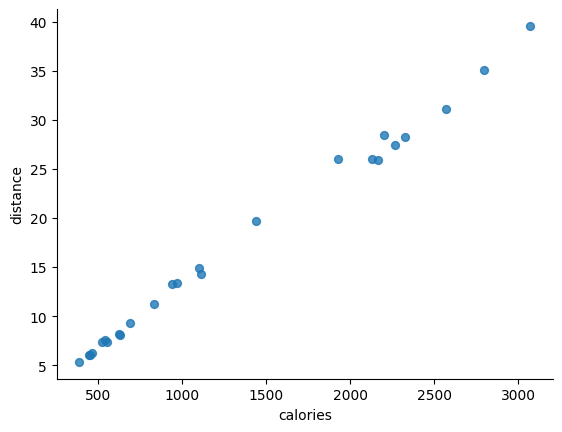

In [ ]:
from matplotlib import pyplot as plt
_df_21.plot(kind='scatter', x='calories', y='distance', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
#9 - grafico entre calorias,distância
nk_cal_dis = nk_analysis.groupby('Ano')[['calories','distance']].sum().reset_index()
#plt.plot(nk_analysis['date'],nk_analysis['calories'])

#plt.show()


,Ano,calories,distance
0,2021,832.638,11.257549
1,2022,5556.828,76.254181
2,2023,15916.956,205.018471
3,2024,10887.958,133.665801


from matplotlib import pyplot as plt
_df_8['Ano'].plot(kind='hist', bins=20, title='Ano')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_9['calories'].plot(kind='hist', bins=20, title='calories')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_10['distance'].plot(kind='hist', bins=20, title='distance')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_11.plot(kind='scatter', x='Ano', y='calories', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_12.plot(kind='scatter', x='calories', y='distance', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Ano']
  ys = series['calories']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_13.sort_values('Ano', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Ano')
_ = plt.ylabel('calories')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Ano']
  ys = series['distance']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_14.sort_values('Ano', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Ano')
_ = plt.ylabel('distance')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['Ano']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'Ano'}, axis=1)
              .sort_values('Ano', ascending=True))
  xs = counted['Ano']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_15.sort_values('Ano', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Ano')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_16['Ano'].plot(kind='line', figsize=(8, 4), title='Ano')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_17['calories'].plot(kind='line', figsize=(8, 4), title='calories')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_18['distance'].plot(kind='line', figsize=(8, 4), title='distance')
plt.gca().spines[['top', 'right']].set_visible(False)

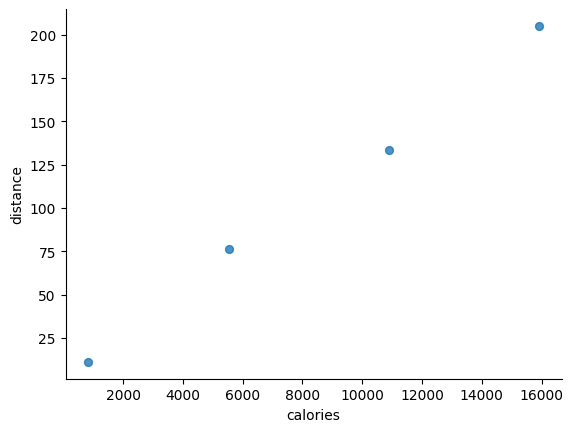

In [ ]:

_df_12.plot(kind='scatter', x='calories', y='distance', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

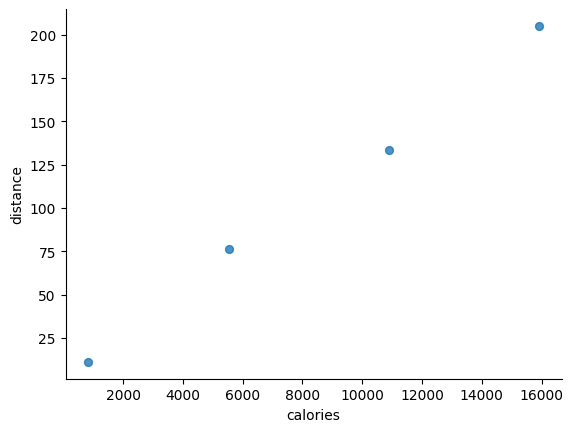

In [ ]:
from matplotlib import pyplot as plt
_df_12.plot(kind='scatter', x='calories', y='distance', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
# - grafico entre pace e distancia

In [ ]:
#Distância máxima por weather - Grafico


In [ ]:
#10 - Gráfico de linha com speed,pace